<a href="https://colab.research.google.com/github/UMB200/AI_ML_pytorch_projects/blob/main/02_pytorch_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02. Pytorch neural network classification


## Summary

This notebook explores the fundamentals of building and training neural networks for classification tasks using PyTorch.

**Technologies Used:**

*   **PyTorch:** The primary deep learning framework used for building and training neural networks.
*   **Scikit-learn:** Used for generating synthetic datasets (`make_circles`, `make_blobs`) and splitting data (`train_test_split`).
*   **Pandas:** Used for initial data manipulation and visualization of the circle data.
*   **Matplotlib:** Used for visualizing the data and the decision boundaries of the trained models.
*   **TorchMetrics:** Used for calculating additional classification metrics.

**ML Algorithms and Concepts:**

*   **Neural Networks:** The core algorithm used for both binary and multi-class classification.
*   **Linear Layers (`nn.Linear`):** The fundamental building blocks of the neural networks, performing linear transformations on the input data.
*   **Activation Functions (`nn.ReLU`, `torch.sigmoid`, `torch.softmax`):** Introduce non-linearity into the models, enabling them to learn complex patterns.
*   **Loss Functions (`nn.BCEWithLogitsLoss`, `nn.CrossEntropyLoss`, `nn.L1Loss`):** Measure the difference between the model's predictions and the true labels.
*   **Optimizers (`torch.optim.SGD`):** Adjust the model's parameters during training to minimize the loss function.
*   **Training Loop:** The iterative process of feeding data to the model, calculating the loss, and updating the model's parameters.
*   **Evaluation Loop:** Assessing the model's performance on unseen data.
*   **Binary Classification:** Classifying data into two categories (used for the circle data).
*   **Multi-class Classification:** Classifying data into more than two categories (used for the blob data).

**Main Code Functions:**

*   **`make_circles` and `make_blobs`:** Functions from scikit-learn to generate synthetic datasets.
*   **`train_test_split`:** Function from scikit-learn to split data into training and testing sets.
*   **`CircleModelClassV0`, `CircleModelClassV1`, `CircleModelClassV2`, `MultiClassBlobModel`:** Custom PyTorch `nn.Module` classes defining the architecture of the different neural networks.
*   **`forward()` method:** Defines the forward pass computation within the custom model classes.
*   **`accuracy_function`:** A custom function to calculate the accuracy of the model's predictions.
*   **`plot_predictions` and `plot_decision_boundary`:** Helper functions (presumably from `helper_functions.py`) for visualizing the data, predictions, and decision boundaries.
*   **`torch.sigmoid` and `torch.softmax`:** PyTorch functions to convert model logits into prediction probabilities.
*   **`torch.argmax` and `torch.round`:** PyTorch functions to convert prediction probabilities into prediction labels.
*   **`nn.BCEWithLogitsLoss`, `nn.CrossEntropyLoss`, `nn.L1Loss`:** PyTorch loss functions.
*   **`torch.optim.SGD`:** PyTorch optimizer.
*   **`torchmetrics.Accuracy`:** Function from TorchMetrics to calculate accuracy.
*   **Training and testing loops:** The main code blocks that iterate through epochs, perform forward and backward passes, and update model parameters.

## 1.0. Make classification data and prepare it

In [ ]:
import sklearn
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch import nn

In [ ]:
# Make 1000 samples
n_samples_madeup = 1000

# Create circles
X_circle, y_circle = make_circles(n_samples_madeup, noise = 0.03, random_state = 42)

In [ ]:
print(f"Length of X circle: {len(X_circle)} | Length of y circle: {len(y_circle)}")
print(f"First 5 samples of X_circle:\n {X_circle[:5]}")
print(f"First 5 samples of y_circle:\n {y_circle[:5]}")

Length of X circle: 1000 | Length of y circle: 1000
First 5 samples of X_circle:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y_circle:
 [1 1 1 1 0]


In [ ]:
# Make DataFrame of circle data
circles_data = pd.DataFrame({"X1": X_circle[:, 0],
                             "X2": X_circle[:, 1],
                             "label": y_circle})
circles_data.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


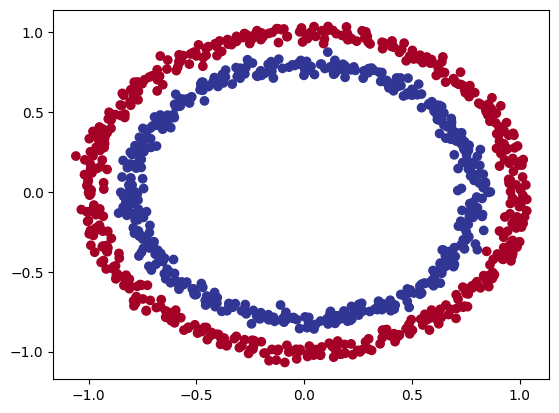

In [ ]:
# Visualize circles data
plt.scatter(x = X_circle[:, 0],
            y = X_circle[:, 1],
            c = y_circle,
            cmap = plt.cm.RdYlBu)

*Note*: This dataset is often what's considered a toy problem (a problem that's used to try and test things out on) in machine learning.

## 1.1 Check input and output shapes

In [ ]:
# Check the shapes of features and labels
X_circle.shape, y_circle.shape

((1000, 2), (1000,))

In [ ]:
X_circle

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# View the first examples of features and labels
X_feature_sample = X_circle[0]
y_label_sample = y_circle[0]

print(f"Values for one sample of X_feature_sample: {X_feature_sample} and the same for y_label_sample: {y_label_sample}")
print(f"Shapes for one sample of X_feature_sample: {X_feature_sample.shape} and the same for y_label_sample: {y_label_sample.shape}")

Values for one sample of X_feature_sample: [0.75424625 0.23148074] and the same for y_label_sample: 1
Shapes for one sample of X_feature_sample: (2,) and the same for y_label_sample: ()


### 1.2 Turn data into tensors and create training and test splits

In [ ]:
# Turn data into tensors
X_circle = torch.from_numpy(X_circle).type(torch.float)
y_circle = torch.from_numpy(y_circle).type(torch.float)
X_circle[:5], y_circle[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
torch.manual_seed(42)

In [ ]:
# Split the data
# 20% test, 80% training, random state for reproducibility
X_training_data, X_test_data, y_training_data, y_test_data = train_test_split(X_circle, y_circle, test_size = 0.2, random_state = 42)

print(len(X_training_data), len(X_test_data), len(y_training_data), len(y_test_data))
print(n_samples_madeup)

800 200 800 200
1000


## 2.0 Building a model
Model to classify blue and red dots above
To do so we need to:
1. Setup device agnostic code
2. Construct a model (by subclassing `nn.Module`)
3. Define a loss function and optimizer
4. Create a training and test loop

In [ ]:
# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

Now we create a model that:
1. Subclasses `nn.Module`
2. Create 2 `nn.Linear()` layers that are capable if handling the shapes of our data
3. Defines a `forward()` method that outlines the forward pass (or forward computaiton) of the model
4. Instantiate an instance of our model class and send it to target `device`

In [ ]:
# 1. Construct a model class that subclasses nn.Module
class CircleModelClassV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Create 2 nn.Linear layers capable of handling the shapes of our data
        self.layer_1 = nn.Linear(in_features = 2, out_features = 5) # takes in 2 features (X), produces 5 features
        self.layer_2 = nn.Linear(in_features = 5, out_features = 1) # takes in 5 features from previous layer, produces 1 feature (y)


    # 3. Define a forward method
    def forward(self, x):
       # Return the output of layer_2, a single feature, the same shape as y
        return self.layer_2(self.layer_1(x)) # computation goes through layer_1 first then the output of layer_1 goes through layer_2

# 4. Create an instance of the model and send it to target device
model_0 = CircleModelClassV0().to(device)
model_0

CircleModelClassV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
device

'cuda'

In [ ]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [ ]:
# Replication of the model using nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]], device='cuda:0')),
             ('0.bias',
              tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]], device='cuda:0')),
             ('1.bias', tensor([-0.1213], device='cuda:0'))])

In [ ]:
# Make predictions
with torch.inference_mode():
  untrained_predictions = model_0(X_test_data.to(device))
print(f"Length of predictions: {len(untrained_predictions)}, Shape: {untrained_predictions.shape}")
print(f"Length of test samples: {len(X_test_data)}, Shape: {X_test_data.shape}")
print(f"\nFirst 10 predictions: {untrained_predictions[:10]}")
print(f"\nFirst 10 labels: {y_test_data[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions: tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967],
        [ 0.2968],
        [ 0.1405],
        [ 0.2178],
        [ 0.0805],
        [-0.0284]], device='cuda:0')

First 10 labels: tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 2.1 Setup loss function and optimizer
To choose which loss function and optimizer:

For regression it can be MAE, or MSE
For classifiction it can be binary cross entropy or categorical cross entropy
Loss function measures how wrong your model predictions are.

For optimizer two most common are SGD `torch.optim.SGD()` and Adam `torch.optim.Adam()`.
* For loss function we will use `torch.nn.BECWithLogitsLoss()`

In [ ]:
#Setup loss function
loss_function = nn.BCEWithLogitsLoss() # has sigmoid activation function built-in
optmizer_SGD = torch.optim.SGD(params = model_0.parameters(), lr = 0.1)

In [ ]:
# Calculate accuracy
def accuracy_function(y_true, y_predictions):
  correct_predictions = torch.eq(y_true, y_predictions).sum().item()
  accuracy = (correct_predictions / len(y_true)) * 100
  return accuracy

## 3.0 Train model
Training loop:
1. Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss backward (backpropagation)
5. Optimizer step (gradient descent)

### 3.1 Going from raw logits -> prediction probabilities -> prediction labels
Our model outputs are going to be raw **logits**
We can convert these **logits** into **prediction probabilities** by passing them to activation function (e.g. sigmoid for binary classification and softmax for multiclass classification)
Then we can convert our model's prediction probabilities to **prediction labels** by either rounding them or taking the `argmax()`.

In [ ]:
#View the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test_data.to(device))[:5]
y_logits

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]], device='cuda:0')

In [ ]:
# Use the sigmoid activaction function on our model logits to turn them into prediction probabilities
y_prediction_probabilities = torch.sigmoid(y_logits)
y_prediction_probabilities

tensor([[0.4916],
        [0.4923],
        [0.5223],
        [0.4827],
        [0.5736]], device='cuda:0')

For our prediction probability values, we need to perform a range-style rounding on them:
* `y_prediction_probabilities >= 0.5, y=1 (class 1)`
* `y_prediction_probabilities < 0.5, y=0 (class 0)`

In [ ]:
# Find prediction labels
y_predictions = torch.round(y_prediction_probabilities)

# in full (logits -> pred probs -> pred labels)
y_prediction_labels = torch.round(torch.sigmoid(model_0(X_test_data.to(device))[:5]))

# check for equality
print(torch.eq(y_predictions.squeeze(), y_prediction_labels.squeeze()))

# Get rid off extra dimension
y_predictions.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 1., 0., 1.], device='cuda:0')

### 3.2 Building training and testing loop

In [ ]:
# Set the manual seed for reproducability
torch.manual_seed(42)

# Set the number of epochs
epoch_qty = 100

# Put data to target device
X_training_data, y_training_data, = X_training_data.to(device),  y_training_data.to(device)
X_test_data, y_test_data = X_test_data.to(device), y_test_data.to(device)

#Build training and evaluation loops
for epoch in range(epoch_qty):
  ### Training
  model_0.train()

  #1. Forward pass
  y_logits = model_0(X_training_data).squeeze() #squeeze to remove extra `1` dimension
  y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> prediction probs -> pred labels

  #2. Calculate loss/accuracy
  loss_value = loss_function(y_logits, y_training_data)
  accuracy_value = accuracy_function(y_true = y_training_data, y_predictions = y_predictions)

  #3. Optimizer zero grad
  optmizer_SGD.zero_grad()

  #4. Loss backward (backpropagation)
  loss_value.backward()

  #5. Optimizer step (gradient descent)
  optmizer_SGD.step()

  ### Testing
  model_0.eval()
  with torch.inference_mode():
    #1. Forward pass
    test_logits = model_0(X_test_data).squeeze()
    test_predictions = torch.round(torch.sigmoid(test_logits))

    #2. Calculate loss/accuracy
    test_loss_value = loss_function(test_logits, y_test_data)
    test_accuracy_value = accuracy_function(y_true = y_test_data, y_predictions = test_predictions)

  # print what happends every 10 epochs
  if epoch % 10 == 0:
    print(f"Epoch #: {epoch} | Loss: {loss_value:.5f} | Accuracy: {accuracy_value:.2f}% | Test Loss: {test_loss_value:.5f} | Test Accuracy: {test_accuracy_value:.2f}%")


Epoch #: 0 | Loss: 0.69796 | Accuracy: 250.00% | Test Loss: 0.69440 | Test Accuracy: 58.00%
Epoch #: 10 | Loss: 0.69590 | Accuracy: 250.00% | Test Loss: 0.69305 | Test Accuracy: 53.00%
Epoch #: 20 | Loss: 0.69490 | Accuracy: 250.00% | Test Loss: 0.69254 | Test Accuracy: 49.50%
Epoch #: 30 | Loss: 0.69435 | Accuracy: 250.00% | Test Loss: 0.69236 | Test Accuracy: 49.50%
Epoch #: 40 | Loss: 0.69401 | Accuracy: 250.00% | Test Loss: 0.69232 | Test Accuracy: 51.00%
Epoch #: 50 | Loss: 0.69378 | Accuracy: 250.00% | Test Loss: 0.69234 | Test Accuracy: 50.00%
Epoch #: 60 | Loss: 0.69362 | Accuracy: 250.00% | Test Loss: 0.69239 | Test Accuracy: 51.50%
Epoch #: 70 | Loss: 0.69351 | Accuracy: 250.00% | Test Loss: 0.69246 | Test Accuracy: 51.00%
Epoch #: 80 | Loss: 0.69342 | Accuracy: 250.00% | Test Loss: 0.69254 | Test Accuracy: 50.00%
Epoch #: 90 | Loss: 0.69336 | Accuracy: 250.00% | Test Loss: 0.69262 | Test Accuracy: 53.00%


## 4.0 Make predictions and evaluate the model

In [ ]:
import requests
from pathlib import Path

# Download helper function
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

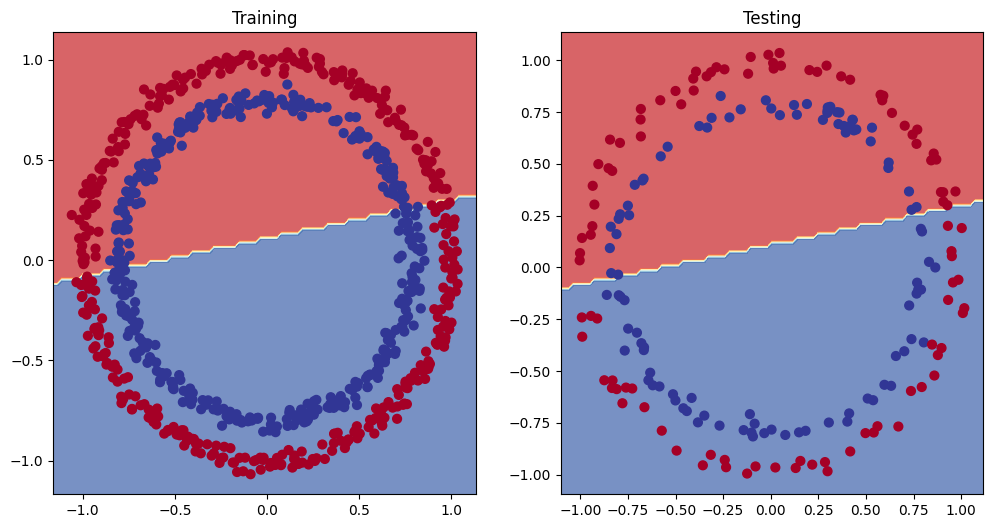

In [ ]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Training")
plot_decision_boundary(model_0, X_training_data, y_training_data)
plt.subplot(1, 2, 2)
plt.title("Testing")
plot_decision_boundary(model_0, X_test_data, y_test_data)

## 5.0 Improving a model
* Add more layers - give the model more chances to learn about patterns in the data
* Add more hidden units - go from 5 hidden units to 10 hidden units
* Fit for longer
* Change the activation function
* Change the learning rate
These options are all from model's perspective because they deal directly with the model, rather than data
Because these options are all values we can change, they're referred as **hyperparameters**

In [ ]:
class CircleModelClassV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
  def forward(self, x):
    return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelClassV1().to(device)
model_1

CircleModelClassV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# Create a loss function
loss_function_model_1 = nn.BCEWithLogitsLoss()
# Create an optimizer
optimizerSGD_model_1 = torch.optim.SGD(params = model_1.parameters(), lr = 0.1)

In [ ]:
# Write a training and evaluation loops
torch.manual_seed(42)
torch.cuda.manual_seed(42)
epoch_qty = 1000
# Put data to target device
X_training_data, y_training_data, = X_training_data.to(device),  y_training_data.to(device)
X_test_data, y_test_data = X_test_data.to(device), y_test_data.to(device)
# Build training and evaluation loops
for epoch in range(epoch_qty):
  ### Training
  model_1.train()
  #1. Forward pass
  y_logits = model_1(X_training_data).squeeze() #squeeze to remove extra `1` dimension
  y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> prediction probs -> pred labels
  #2. Calculate loss/accuracy
  loss_value = loss_function_model_1(y_logits, y_training_data)
  accuracy_value = accuracy_function(y_true = y_training_data, y_predictions = y_predictions)
  #3. Optimize zero grad
  optimizerSGD_model_1.zero_grad()
  #4. Loss backward (backpropagation)
  loss_value.backward()
  #5. Optimizer step (gradient descent)
  optimizerSGD_model_1.step()
  ### Testing
  model_1.eval()
  with torch.inference_mode():
    #1. Forward pass
    test_logits = model_1(X_test_data).squeeze()
    test_predictions = torch.round(torch.sigmoid(test_logits))
    #2. Calculate loss/accuracy
    test_loss_value = loss_function_model_1(test_logits, y_test_data)
    test_accuracy_value = accuracy_function(y_true = y_test_data, y_predictions = test_predictions)
  # Print every 100 epochs
  if epoch % 100 == 0:
    print(f"Epoch #: {epoch} | Loss: {loss_value:.5f} | Accuracy: {accuracy_value:.2f}% | Test Loss: {test_loss_value:.5f} | Test Accuracy: {test_accuracy_value:.2f}%")

Epoch #: 0 | Loss: 0.69396 | Accuracy: 250.00% | Test Loss: 0.69261 | Test Accuracy: 51.00%
Epoch #: 100 | Loss: 0.69305 | Accuracy: 250.00% | Test Loss: 0.69379 | Test Accuracy: 48.00%
Epoch #: 200 | Loss: 0.69299 | Accuracy: 250.00% | Test Loss: 0.69437 | Test Accuracy: 46.00%
Epoch #: 300 | Loss: 0.69298 | Accuracy: 250.00% | Test Loss: 0.69458 | Test Accuracy: 45.00%
Epoch #: 400 | Loss: 0.69298 | Accuracy: 250.00% | Test Loss: 0.69465 | Test Accuracy: 46.00%
Epoch #: 500 | Loss: 0.69298 | Accuracy: 250.00% | Test Loss: 0.69467 | Test Accuracy: 46.00%
Epoch #: 600 | Loss: 0.69298 | Accuracy: 250.00% | Test Loss: 0.69468 | Test Accuracy: 46.00%
Epoch #: 700 | Loss: 0.69298 | Accuracy: 250.00% | Test Loss: 0.69468 | Test Accuracy: 46.00%
Epoch #: 800 | Loss: 0.69298 | Accuracy: 250.00% | Test Loss: 0.69468 | Test Accuracy: 46.00%
Epoch #: 900 | Loss: 0.69298 | Accuracy: 250.00% | Test Loss: 0.69468 | Test Accuracy: 46.00%


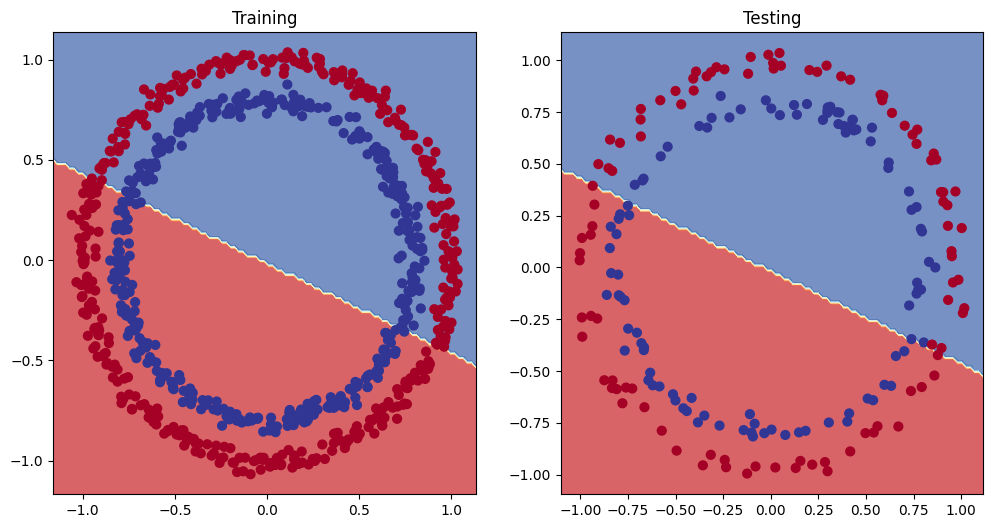

In [ ]:
# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Training")
plot_decision_boundary(model_1, X_training_data, y_training_data)
plt.subplot(1, 2, 2)
plt.title("Testing")
plot_decision_boundary(model_1, X_test_data, y_test_data)

### 5.1 Preparing data to see if our model can model a straight line

In [ ]:
# Create *known* data as in notebook 1
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01
# Creare data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias
# Check the data
print(len(X_regression))
X_regression[0:5], y_regression[0:5]
#plt.scatter(X_regression, y_regression)
#

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [ ]:
# Create train and test splits
training_split = int(0.8 * len(X_regression))
X_training_data_regression, y_training_data_regression = X_regression[:training_split], y_regression[:training_split]
X_test_data_regression, y_test_data_regression = X_regression[training_split:], y_regression[training_split:]
# Check the length of each
len(X_training_data_regression), len(y_training_data_regression), len(X_test_data_regression), len(y_test_data_regression)

(80, 80, 20, 20)

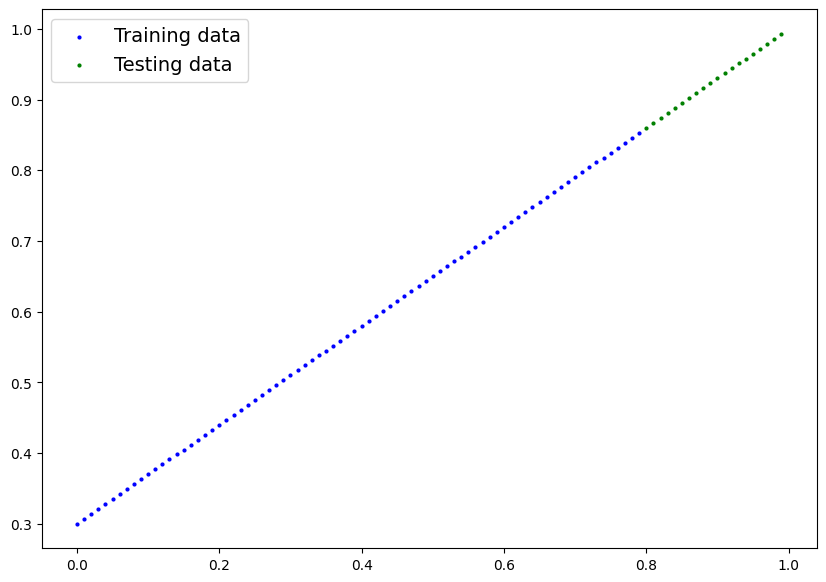

In [ ]:
plot_predictions(train_data = X_training_data_regression,
                 train_labels = y_training_data_regression,
                 test_data = X_test_data_regression,
                 test_labels = y_test_data_regression)

### 5.2 Adjusting `model_1` to fit a stright line

In [ ]:
# Same as arcutecture as model 1
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

In [ ]:
# Loss and optimizer
loss_function_model_2 = nn.L1Loss()
optimizer_model_2 = torch.optim.SGD(params = model_2.parameters(), lr = 0.01)

In [ ]:
# training the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)
epoch_qty = 1000
#Put the data
X_training_data_regression, y_training_data_regression = X_training_data_regression.to(device), y_training_data_regression.to(device)

X_test_data_regression, y_test_data_regression = X_test_data_regression.to(device), y_test_data_regression.to(device)
#Training
for epoch in range(epoch_qty):
  y_pred = model_2(X_training_data_regression)
  loss = loss_function_model_2(y_pred, y_training_data_regression)
  optimizer_model_2.zero_grad()
  loss.backward()
  optimizer_model_2.step()
  #Testing
  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_data_regression)
    test_loss = loss_function_model_2(test_pred, y_test_data_regression)
  # print
  if epoch % 100 == 0:
    print(f"Epoch #: {epoch} | Loss: {loss:.5f} | Test Loss: {test_loss:.5f}")


Epoch #: 0 | Loss: 0.75986 | Test Loss: 0.91103
Epoch #: 100 | Loss: 0.02858 | Test Loss: 0.00081
Epoch #: 200 | Loss: 0.02533 | Test Loss: 0.00209
Epoch #: 300 | Loss: 0.02137 | Test Loss: 0.00305
Epoch #: 400 | Loss: 0.01964 | Test Loss: 0.00341
Epoch #: 500 | Loss: 0.01940 | Test Loss: 0.00387
Epoch #: 600 | Loss: 0.01903 | Test Loss: 0.00379
Epoch #: 700 | Loss: 0.01878 | Test Loss: 0.00381
Epoch #: 800 | Loss: 0.01840 | Test Loss: 0.00329
Epoch #: 900 | Loss: 0.01798 | Test Loss: 0.00360


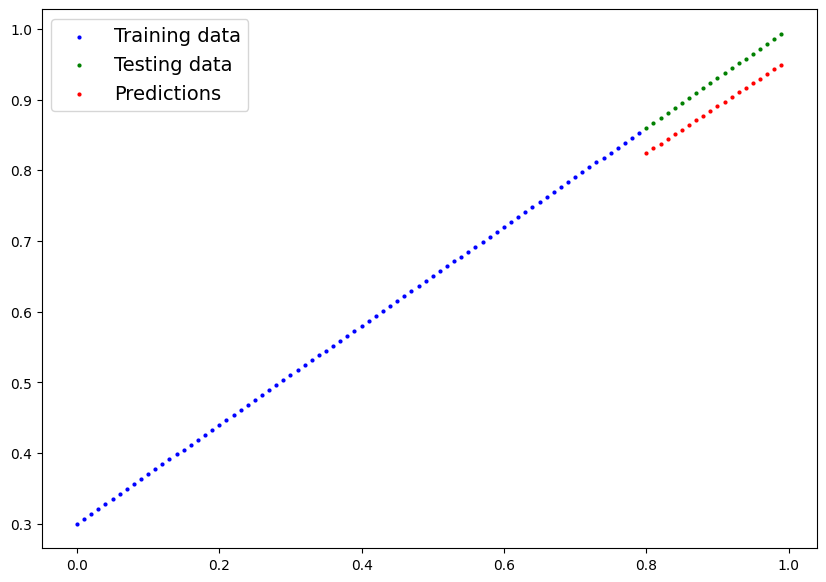

In [ ]:
# Turn on evaluation mode
model_2.eval()
#Make predictions
with torch.inference_mode():
  y_predictions = model_2(X_test_data_regression)
#Plot data and predictions
plot_predictions(train_data = X_training_data_regression.cpu(),
                 train_labels = y_training_data_regression.cpu(),
                 test_data = X_test_data_regression.cpu(),
                 test_labels = y_test_data_regression.cpu(),
                 predictions = y_predictions.cpu());

## 6.0 The missing piece: non-linearity

### 6.1. Recreate non-linear data (red and blue circles)

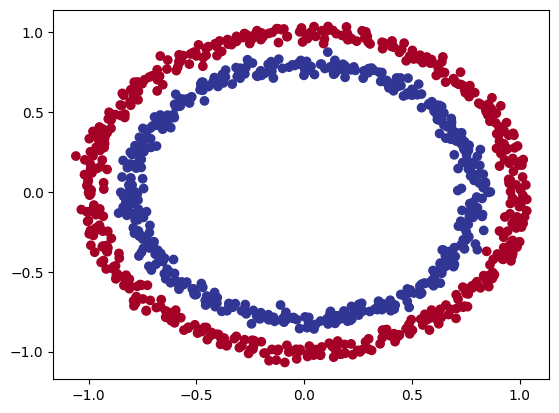

In [ ]:
# Make and plot data
n_samples = 1000
X, y = make_circles(n_samples, noise=0.03, random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [ ]:
# Convert data to tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train[:5], y_train[:5]


(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

### 6.2. Building a model with mon-linearity

In [ ]:
# Build a model with non-linear activation function
class CircleModelClassV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU()
  def forward(self, x):
    return self.layer_3(self.relu(self.relu(self.layer_2(self.layer_1(x)))))
model_3 = CircleModelClassV2().to(device)
print(model_3)

CircleModelClassV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [ ]:
# Setup loss and optmizier
loss_function_model_3 = nn.BCEWithLogitsLoss()
optimizer_model_3 = torch.optim.SGD(params = model_3.parameters(), lr = 0.1)

### 6.3 Training model with non-lineary

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
epoch_qty = 1000
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epoch_qty):
  # 1. Forward pass
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))
  # 2 Calculate loss/accuracy
  loss = loss_function_model_3(y_logits, y_train)
  accuracy_value = accuracy_function(y_true=y_train, y_predictions = y_pred)
  #3 Optimize zero grad
  optimizer_model_3.zero_grad()
  # 4. Loss backward
  loss.backward()
  #5. Optmize step
  optimizer_model_3.step()
  ### Testing
  model_3.eval()
  with torch.inference_mode():
    #1. Forward pass
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    #2 Calculate loss/accuracy
    test_loss = loss_function_model_3(test_pred, y_test)
    test_accuracy_value = accuracy_function(y_true=y_test, y_predictions = test_pred)
  # print
  if epoch % 100 == 0:
    print(f"Epoch #: {epoch} | Loss: {loss:.5f} | Accuracy: {accuracy_value:.2f}% |Test Loss: {test_loss:.5f}| Test accuracy: {test_accuracy_value:.2f}%")

Epoch #: 0 | Loss: 0.69833 | Accuracy: 50.00% |Test Loss: 0.79544| Test accuracy: 49.00%
Epoch #: 100 | Loss: 0.69289 | Accuracy: 50.88% |Test Loss: 0.76941| Test accuracy: 47.00%
Epoch #: 200 | Loss: 0.69015 | Accuracy: 53.37% |Test Loss: 0.73759| Test accuracy: 50.00%
Epoch #: 300 | Loss: 0.68762 | Accuracy: 56.62% |Test Loss: 0.71499| Test accuracy: 55.00%
Epoch #: 400 | Loss: 0.68469 | Accuracy: 60.00% |Test Loss: 0.69580| Test accuracy: 61.00%
Epoch #: 500 | Loss: 0.67985 | Accuracy: 56.00% |Test Loss: 0.70251| Test accuracy: 60.50%
Epoch #: 600 | Loss: 0.67280 | Accuracy: 56.00% |Test Loss: 0.70371| Test accuracy: 60.50%
Epoch #: 700 | Loss: 0.66304 | Accuracy: 64.50% |Test Loss: 0.67580| Test accuracy: 65.00%
Epoch #: 800 | Loss: 0.64710 | Accuracy: 74.12% |Test Loss: 0.63910| Test accuracy: 71.50%
Epoch #: 900 | Loss: 0.62182 | Accuracy: 81.62% |Test Loss: 0.60119| Test accuracy: 78.00%


### 6.4 Evaluating a model trained with non-linear activation functions

In [ ]:
# Make predictions
model_3.eval()
with torch.inference_mode():
  y_predictions = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_predictions[:10], y[:10]

(tensor([1., 1., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.]))

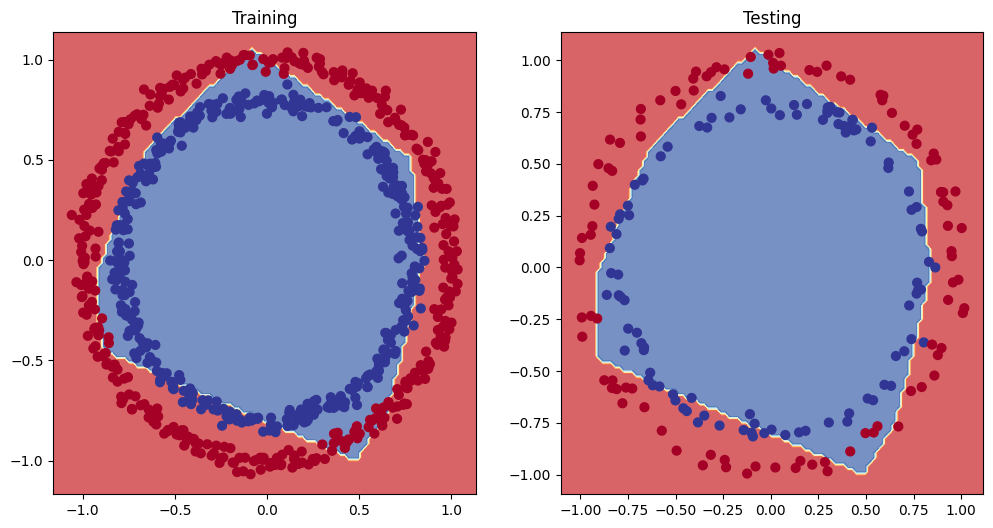

In [ ]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Training")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Testing")
plot_decision_boundary(model_3, X_test, y_test)

## 7.0. Replicating non-linear acivation functions

Nueral networks use linear and non-linear functions to discover patterns

In [ ]:
# Create a tensor
A = torch.arange(-10, 10, 1, dtype=torch.float32)
A.dtype, A

(torch.float32,
 tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
           2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.]))

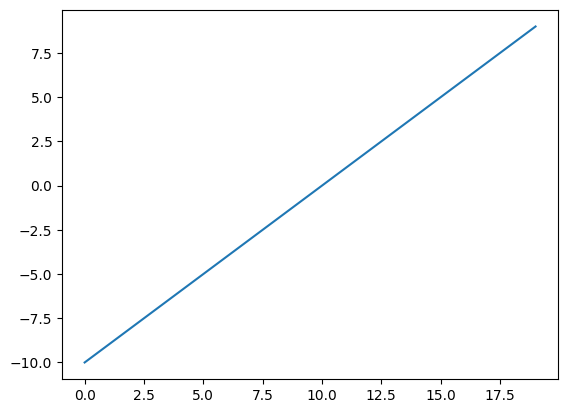

In [ ]:
# Visual the data
plt.plot(A)

In [ ]:
# Create ReLU function
def relu(x):
  return torch.maximum(torch.tensor(0), x)
relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

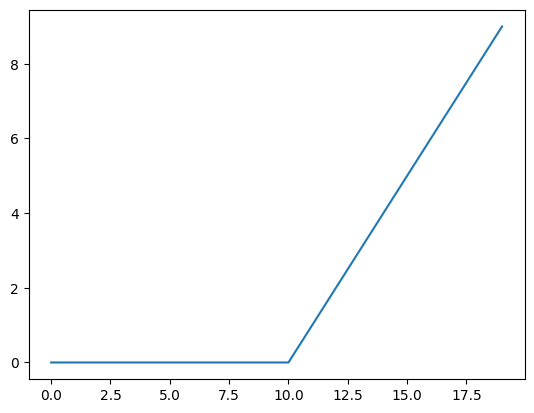

In [ ]:
# Plot ReLU function
plt.plot(relu(A))

In [ ]:
# Custom Sigmoid function from here https://docs.pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html
def sigmoid(x):
  return 1 / (1 + torch.exp(-x))
sigmoid(A)

tensor([4.5398e-05, 1.2339e-04, 3.3535e-04, 9.1105e-04, 2.4726e-03, 6.6929e-03,
        1.7986e-02, 4.7426e-02, 1.1920e-01, 2.6894e-01, 5.0000e-01, 7.3106e-01,
        8.8080e-01, 9.5257e-01, 9.8201e-01, 9.9331e-01, 9.9753e-01, 9.9909e-01,
        9.9966e-01, 9.9988e-01])

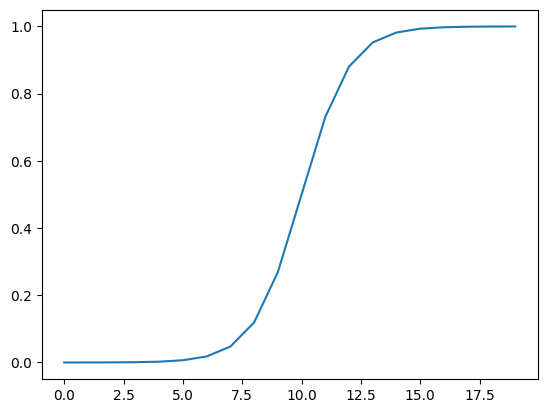

In [ ]:
# Plot sigmoid function
plt.plot(sigmoid(A))

## 8.0 Putting things together by building mult-class class PyTorch model

### 8.1 Creating multi-class classification data
One method is to use `make_blob()` method
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

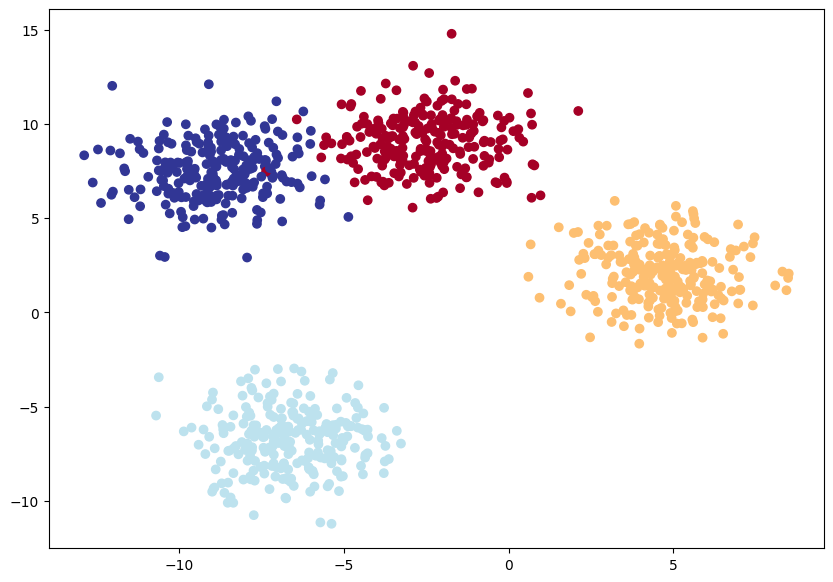

In [ ]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set hyperparameters
NUMBER_OF_CLASSES = 4
NUMBER_OF_FEATURES = 2
RANDOM_SEED = 42
NUMBER_OF_SAMPLES = 1000
STD_DEV_OF_CLUSTER = 1.5 # gives the clusters a little shake up

#1. Create multi-class data
X_multi_blob, y_multi_blob = make_blobs(n_samples = NUMBER_OF_SAMPLES,
                                         n_features = NUMBER_OF_FEATURES,
                                         centers = NUMBER_OF_CLASSES,
                                         cluster_std = STD_DEV_OF_CLUSTER,
                                         random_state = RANDOM_SEED)
#2. Turn data into tensor
X_multi_blob = torch.from_numpy(X_multi_blob).type(torch.float)
y_multi_blob = torch.from_numpy(y_multi_blob).type(torch.LongTensor)

#3. Split into training
X_train_multi_blob, X_test_multi_blob, y_train_multi_blob, y_test_multi_blob = train_test_split(X_multi_blob, y_multi_blob, test_size = 0.2, random_state= RANDOM_SEED)

#4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_multi_blob[:, 0], X_multi_blob[:, 1], c=y_multi_blob, cmap=plt.cm.RdYlBu)


### 8.2 Bulding multi-class classification model in PyTorch

In [ ]:
#Device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
# Building a multiclass model
class MultiClassBlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    """ Initializes multiclass classification model

    Args:
      input_features (int): Number of input features
      output_features (int): Number of output features
      hidden_units (int): Number of hidden units between layers, default is 8
    Returns:
    Example:
    """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self, x):
    return self.linear_layer_stack(x)

# Create an instance of BlobModel and send it to target device
model_4_blob = MultiClassBlobModel(input_features=NUMBER_OF_FEATURES,
                                   output_features=NUMBER_OF_CLASSES,
                                   hidden_units=8).to(device)
model_4_blob

MultiClassBlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

### 8.3 Create a loss function and an optimizer for a multi-class model

In [ ]:
# Create a loss function and optimizer
loss_function_entropy = nn.CrossEntropyLoss()
optimizer_model_4 = torch.optim.SGD(params=model_4_blob.parameters(), lr = 0.1)

### 8.4 Getting prediction probabilities for multi-class PyTorch model
In order to evaluate and train and test our model we need to convert out model's outputs (logits) to prediction probabilities and then to probabilities labels
logits (raw output of the model-> pred probs (use `torch.softmax`)-> pred labels (take argmax of the prediction probabilities)

In [ ]:
# get raw outputs (logits) of our model
model_4_blob.eval()
with torch.inference_mode():
  y_logits = model_4_blob(X_test_multi_blob.to(device))

In [ ]:
# Convert model's logit outputs to prediction probabilities
y_prediction_probabilities = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_prediction_probabilities[:5])

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]], device='cuda:0')
tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]], device='cuda:0')


In [ ]:
# sum of prediction probablities
print(torch.sum(y_prediction_probabilities[0]))
# max element of prediction probabilities
print(torch.max(y_prediction_probabilities[0]))

tensor(1., device='cuda:0')
tensor(0.3244, device='cuda:0')


In [ ]:
# Convert model's prediction probabilities to prediction labels
y_predictions = torch.argmax(y_prediction_probabilities, dim=1)
y_predictions[:5]

tensor([1, 0, 0, 0, 0], device='cuda:0')

### 8.5 Create a training and testing loop for a multi-class PyTorch model

In [ ]:
# Fit the multi-class model to the data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set quantity of epochs
epoch_qty = 100

# Put data to target device
X_train_multi_blob, y_train_multi_blob = X_train_multi_blob.to(device), y_train_multi_blob.to(device)

X_test_multi_blob, y_test_multi_blob = X_test_multi_blob.to(device), y_test_multi_blob.to(device)

# Build training and testing loops
for epoch in range(epoch_qty):
  ### Training
  model_4_blob.train()

  #1. Forward pass
  y_logits = model_4_blob(X_train_multi_blob)
  y_predictions = torch.softmax(y_logits, dim=1).argmax(dim=1)

  #2. Calculate loss/accuracy
  loss_value = loss_function_entropy(y_logits,
                                     y_train_multi_blob)
  accuracy_value = accuracy_function(y_true = y_train_multi_blob,
                                     y_predictions = y_predictions)

  optimizer_model_4.zero_grad()
  loss_value.backward()
  optimizer_model_4.step()

  ### Testing
  model_4_blob.eval()
  with torch.inference_mode():
    test_logits = model_4_blob(X_test_multi_blob)
    test_predictions = torch.softmax(test_logits, dim=1).argmax(dim=1)
    test_loss_value = loss_function_entropy(test_logits, y_test_multi_blob)
    test_accuracy_value = accuracy_function(y_true = y_test_multi_blob,
                                            y_predictions = test_predictions)

  if epoch % 10 == 0:
    print(f"Epoch #: {epoch} | Loss: {loss_value:.4f} | Accuracy: {accuracy_value:.2f}% | Test Loss: {test_loss_value:.4f} | Test Accuracy: {test_accuracy_value:.2f}%")

Epoch #: 0 | Loss: 1.1588 | Accuracy: 40.38% | Test Loss: 1.0755 | Test Accuracy: 48.00%
Epoch #: 10 | Loss: 0.6448 | Accuracy: 96.75% | Test Loss: 0.6607 | Test Accuracy: 97.50%
Epoch #: 20 | Loss: 0.4254 | Accuracy: 98.50% | Test Loss: 0.4307 | Test Accuracy: 100.00%
Epoch #: 30 | Loss: 0.2529 | Accuracy: 99.12% | Test Loss: 0.2451 | Test Accuracy: 99.50%
Epoch #: 40 | Loss: 0.1123 | Accuracy: 99.25% | Test Loss: 0.1023 | Test Accuracy: 99.50%
Epoch #: 50 | Loss: 0.0663 | Accuracy: 99.25% | Test Loss: 0.0585 | Test Accuracy: 99.50%
Epoch #: 60 | Loss: 0.0507 | Accuracy: 99.25% | Test Loss: 0.0429 | Test Accuracy: 99.50%
Epoch #: 70 | Loss: 0.0430 | Accuracy: 99.25% | Test Loss: 0.0349 | Test Accuracy: 99.50%
Epoch #: 80 | Loss: 0.0384 | Accuracy: 99.25% | Test Loss: 0.0299 | Test Accuracy: 99.50%
Epoch #: 90 | Loss: 0.0352 | Accuracy: 99.25% | Test Loss: 0.0266 | Test Accuracy: 99.50%


### 8.6 Making and evaluating predictions with a PyTorch multi-class model

In [ ]:
# Make predictions
model_4_blob.eval()
with torch.inference_mode():
  y_logits = model_4_blob(X_test_multi_blob)

# view first 10 predictions
y_logits[:10]

tensor([[-0.6249,  5.9860, -7.6323, -8.4470],
        [-2.1738, -6.3750, -3.7202,  3.1203],
        [-3.4102, -3.8958,  3.1567, -2.6119],
        [-1.1505,  4.1962, -3.8472, -4.8820],
        [ 3.7548, -1.3391, -9.1422, -6.9466],
        [-2.8211, -7.5767, -4.2944,  3.7944],
        [-3.0306, -3.3328,  2.7955, -2.1374],
        [ 3.3761, -4.0375, -6.8987, -3.5503],
        [-4.3620, -4.9904,  3.8123, -3.3814],
        [ 3.5012, -3.0281, -7.5401, -4.7064]], device='cuda:0')

In [ ]:
# Convert from logits to Prediction probabilities
y_prediction_probabilities = torch.softmax(y_logits, dim=1)
y_prediction_probabilities[:10]

tensor([[1.3438e-03, 9.9865e-01, 1.2164e-06, 5.3854e-07],
        [4.9905e-03, 7.4740e-05, 1.0630e-03, 9.9387e-01],
        [1.3985e-03, 8.6060e-04, 9.9463e-01, 3.1073e-03],
        [4.7389e-03, 9.9483e-01, 3.1956e-04, 1.1353e-04],
        [9.9388e-01, 6.0966e-03, 2.4904e-06, 2.2378e-05],
        [1.3372e-03, 1.1504e-05, 3.0644e-04, 9.9834e-01],
        [2.9138e-03, 2.1537e-03, 9.8781e-01, 7.1181e-03],
        [9.9838e-01, 6.0198e-04, 3.4435e-05, 9.7989e-04],
        [2.8147e-04, 1.5016e-04, 9.9882e-01, 7.5044e-04],
        [9.9825e-01, 1.4575e-03, 1.5998e-05, 2.7210e-04]], device='cuda:0')

In [ ]:
# Convert from Prediction probabilities to prediction labels
y_prediction_probabilities = torch.argmax(y_prediction_probabilities, dim=1)
y_prediction_probabilities[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')

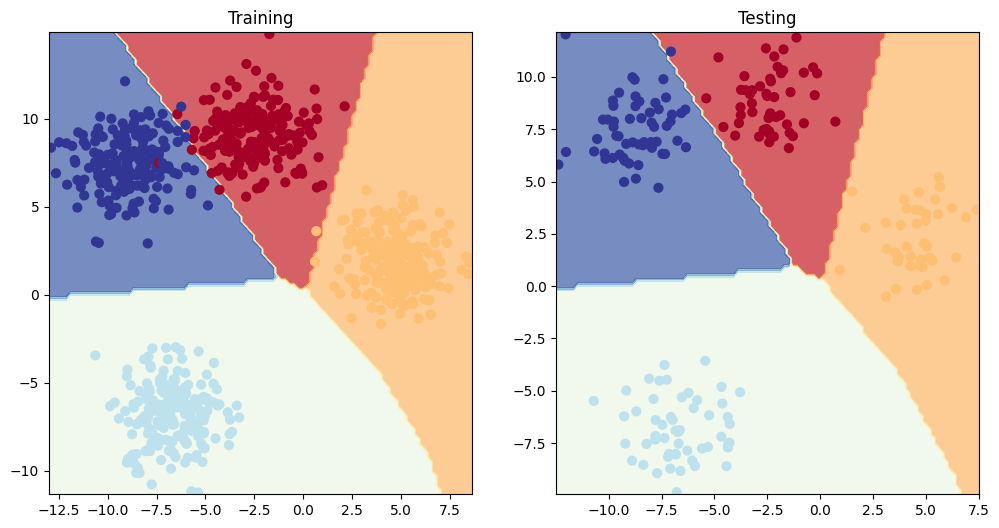

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Training")
plot_decision_boundary(model_4_blob, X_train_multi_blob, y_train_multi_blob)
plt.subplot(1, 2, 2)
plt.title("Testing")
plot_decision_boundary(model_4_blob, X_test_multi_blob, y_test_multi_blob)



## 9.0 More classification metrics
* Precision
* Accuracy
* Recall
* F1
* Confusion matrix
* Classification report

https://medium.com/data-science/beyond-accuracy-precision-and-recall-3da06bea9f6c
https://willkoehrsen.github.io/statistics/learning/beyond-accuracy-precision-and-recall/


In [ ]:
!pip install torchmetrics

In [ ]:
from torchmetrics import Accuracy
# Setup metrics
torchmetrics_accuracy = Accuracy(task="multiclass", num_classes=4).to(device)
# Calculate accuracy
torchmetrics_accuracy(y_prediction_probabilities, y_test_multi_blob)

tensor(0.9950, device='cuda:0')